<h1 style="text-align: center;">Experiment 2</h1>

#### Aim: Build an Artificial Neural Network to implement Multi-Class Classification task using the Back-propagation algorithm and test the same using appropriate data sets

### Database
* The data that will be incorporated is the **MNIST database** (Modified National Institute of Standards and Technology database) which contains 60,000 images for training and 10,000 test images.
* The dataset consists of small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9
* The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [1]:
from tensorflow import keras
from keras.datasets import mnist     # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


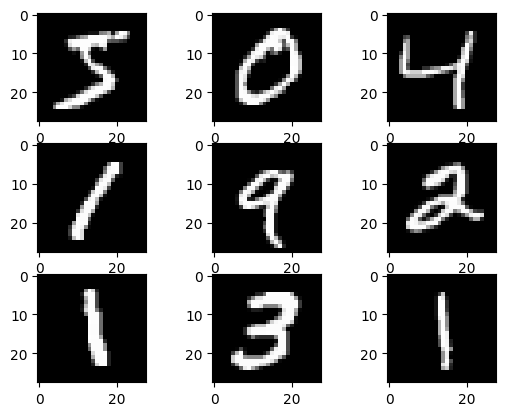

In [2]:
# Plot first few images
import matplotlib.pyplot as plt
for i in range(9):
	# define subplot
	plt.subplot(3,3,i+1) # 3 rows, 3 col, pos
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray')
# show the figure
plt.show()

In [3]:
X_train[i].shape

(28, 28)

In [4]:
# Each pixel is an 8-bit integer from 0-255 (0 is full black, 255 is full white)
# single-channel pixel or monochrome image
X_train[i][10:20,10:20]

array([[  0,   0,  20, 254, 254, 108,   0,   0,   0,   0],
       [  0,   0,  16, 239, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 143,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 162,   0,   0,   0,   0],
       [  0,   0,   0, 178, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0, 113, 254, 240,   0,   0,   0,   0],
       [  0,   0,   0,  83, 254, 245,  31,   0,   0,   0],
       [  0,   0,   0,  79, 254, 246,  38,   0,   0,   0],
       [  0,   0,   0,   0, 214, 254, 150,   0,   0,   0]], dtype=uint8)

### Formatting the input data

* Reshape (or flatten) the 28x28 image into a 784-length vector.


<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' width=50%>

* Input values [0-255] are Normalized in the range [0-1]

A `Min-Max Scaling` is typically done via the following equation:

$$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$$

$X_i$ is the $i^{th}$ sample of dataset.

In [5]:
# reshape 28 x 28 matrices into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# normalize each value for each pixel for the entire vector for each input
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize by dividing by largest pixel value
X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


### DNN for Multi-class classification using Keras library

In [25]:
from keras.models import Sequential
from keras.layers import Dense

mdl = Sequential()

# Assuming input shape is (784,)
input_shape = (784,)

# Input layer with 64 units and relu activation
mdl.add(Dense(64, input_shape=input_shape, activation='relu'))

# Hidden layer with 32 units and relu activation
mdl.add(Dense(32, activation='relu'))

# Output layer with 10 units and softmax activation
mdl.add(Dense(10, activation='softmax'))

# Compile model
mdl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [26]:
# Visualize the model
from keras.utils import plot_model
plot_model(mdl, show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
# Display model summary
mdl.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Convert labels to "one-hot" vectors using the to_categorical function
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```


In [12]:
from keras.utils import to_categorical
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)
print(y_test[6])
print(y_test1[6,:])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [28]:
# Train the model
epochs=10
batch = 64
mdl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = mdl.fit(X_train, y_train1,epochs=epochs, batch_size=batch,verbose=1, validation_data=(X_test, y_test1))

Epoch 1/10


938/938 [==============================] - 11s 8ms/step - loss: 0.3488 - accuracy: 0.9025 - val_loss: 0.1868 - val_accuracy: 0.9434
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1573 - accuracy: 0.9540 - val_loss: 0.1470 - val_accuracy: 0.9563
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.1157 - accuracy: 0.9661 - val_loss: 0.1206 - val_accuracy: 0.9650
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0903 - accuracy: 0.9724 - val_loss: 0.1034 - val_accuracy: 0.9696
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.1035 - val_accuracy: 0.9691
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0916 - val_accuracy: 0.9712
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0519 - accuracy: 0.9838 - val_loss: 0.0933 - val_accuracy: 0.9726
Epo

# Evaluate Model

### Plot Learning graphs

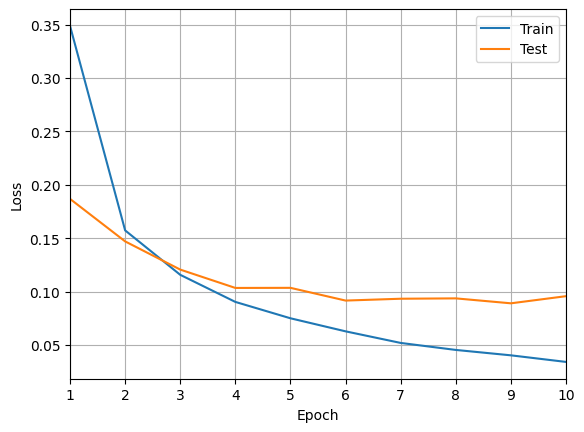

In [29]:
epochRange = range(1,epochs+1)
plt.plot(epochRange,history.history['loss'])
plt.plot(epochRange,history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

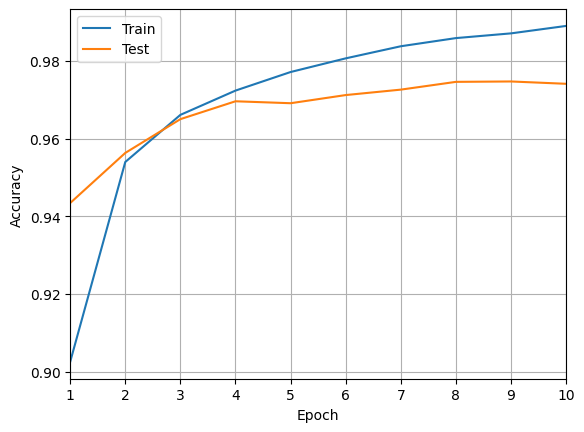

In [30]:
plt.plot(epochRange,history.history['accuracy'])
plt.plot(epochRange,history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.xlim((1,epochs))
plt.legend(['Train','Test'])
plt.show()

#### Performance metrics

In [31]:
import numpy as np
yhat_test_mdl_prob = mdl.predict(X_test);
yhat_test_mdl = np.argmax(yhat_test_mdl_prob,axis=-1)
print(yhat_test_mdl_prob[0])
print(yhat_test_mdl[0:10])
print(y_test[0:10])

313/313 [==============================] - 2s 5ms/step
[1.8183135e-08 1.4297991e-08 1.6334784e-06 4.7384405e-05 5.5701602e-12
 3.4758187e-08 6.8623319e-13 9.9994826e-01 2.0901524e-07 2.2812178e-06]
[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


In [32]:
from sklearn.metrics import accuracy_score
print('Accuracy:')
print(float(accuracy_score(y_test, yhat_test_mdl))*100,'%')

Accuracy:
97.41 %


In [33]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_test_mdl))

Confusion Matrix:
[[ 968    1    3    1    0    2    2    2    1    0]
 [   0 1118    4    0    0    2    3    4    4    0]
 [   5    2 1010    3    3    0    1    6    2    0]
 [   0    0    4  984    0    2    0   10    3    7]
 [   0    0    3    1  962    0    5    5    1    5]
 [   4    0    0   18    1  865    1    1    1    1]
 [   7    3    4    0    3    7  933    0    1    0]
 [   1    2   10    1    1    0    0 1005    0    8]
 [   3    1    6    9    6    5    5    7  928    4]
 [   0    2    0    8   10    5    1   11    4  968]]


#### Conclusion: The accuracy was found out to be 97.41 %.